# Titanic Survival Analysis 🛳️⚓❤️📊📈

## Import modules 📔📚

In [1]:
!python -m pip install -r requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


## 📂 Create Dataset

In [2]:
# to make dataset
# run the file data_generate.py
!python data_generate.py

## 📌 Main Tasks

### 🔹 Data Preparation

In [3]:
df = pd.read_csv("titanic_survival_dataset.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3999,0,3,Countess. Rose White,male,NaN,0.0,0.0,PC 5419,41.02,NaN,S
1,11697,0,3,Mrs. Gladys White,male,35.0,0.0,1.0,SC/AH 8133,93.18,NaN,S
2,14382,1,3,Countess. Grace Smith,male,23.0,NaN,0.0,SC/Paris 7863,40.18,NaN,S
3,3150,0,3,Major. Richard Davis,male,22.0,0.0,0.0,STON/O2 9546,1.94,NaN,S
4,3766,0,3,Lady. Alice Brown,male,50.0,0.0,1.0,SOTON/OQ 6197,NaN,F44,C


### 🔹 Data Cleaning

In [4]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              567
SibSp            565
Parch            617
Ticket             0
Fare             626
Cabin          10689
Embarked           0
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
if df.duplicated().sum() > 0:
    print(f"{df.duplicated().sum()} Duplicate rows found and will be removed.")
    df = df.drop_duplicates()
    print(f"Now there are {df.duplicated().sum()} duplicate rows after removal.")
else:
    print("No duplicate rows found.")

27 Duplicate rows found and will be removed.
Now there are 0 duplicate rows after removal.


### 🔹 Data Analysis

In [7]:
# ===============================
# 1. Basic Info
# ===============================
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

numeric_cols = ["Age", "Fare", "SibSp", "Parch", "Pclass"]
print("\nSummary Statistics:\n", df[numeric_cols].describe(include="all"))

missing_percent = (df.isna().sum() / len(df)) * 100
print("\nMissing Values (%):\n", missing_percent)

# ===============================
# 2. Survival Analysis
# ===============================
survival_rate = df["Survived"].mean()
print("\nOverall Survival Rate:", survival_rate)

survival_by_class = df.groupby("Pclass")["Survived"].mean().sort_values(ascending=False)
print("\nSurvival Rate by Passenger Class:\n", survival_by_class)

survival_by_sex = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
print("\nSurvival Rate by Sex:\n", survival_by_sex)

survival_by_embarked = df.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)
print("\nSurvival Rate by Embarked Port:\n", survival_by_embarked)

# ===============================
# 3. Age & Fare Analysis
# ===============================
avg_age_survival = df.groupby("Survived")["Age"].mean()
print("\nAverage Age by Survival:\n", avg_age_survival)

avg_fare_survival = df.groupby("Survived")["Fare"].mean()
print("\nAverage Fare by Survival:\n", avg_fare_survival)

# ===============================
# 4. Correlations
# ===============================
corr_matrix = df[numeric_cols + ["Survived"]].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# ===============================
# 5. Family Analysis (SibSp + Parch)
# ===============================
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1
survival_by_family = df.groupby("Family_Size")["Survived"].mean()
print("\nSurvival Rate by Family Size:\n", survival_by_family.head(10))

# ===============================
# 6. Derived Metrics
# ===============================
# Example: Age to Fare ratio
df["Age_to_Fare"] = df["Age"] / df["Fare"].replace(0, np.nan)
print("\nGlobal Average Age-to-Fare Ratio:", df["Age_to_Fare"].mean())

# Example: Child indicator (Age < 12)
df["Child"] = df["Age"].apply(lambda x: 1 if x < 12 else 0)
child_survival = df.groupby("Child")["Survived"].mean()
print("\nSurvival Rate for Children vs Adults:\n", child_survival)

# Example: Alone indicator
df["Alone"] = (df["SibSp"] + df["Parch"] == 0).astype(int)
alone_survival = df.groupby("Alone")["Survived"].mean()
print("\nSurvival Rate for Alone vs With Family:\n", alone_survival)

Dataset Shape: (3745, 12)

Column Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Summary Statistics:
                Age         Fare        SibSp        Parch       Pclass
count  3745.000000  3745.000000  3745.000000  3745.000000  3745.000000
mean     29.278638    24.948961     0.493191     0.402403     2.457944
std      13.761844    41.667983     0.681736     0.630548     0.740976
min       0.500000     0.150000     0.000000     0.000000     1.000000
25%      20.000000     5.360000     0.000000     0.

### 🔹 Data Visualization

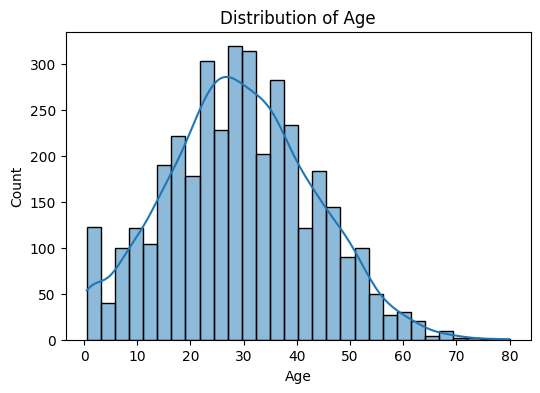

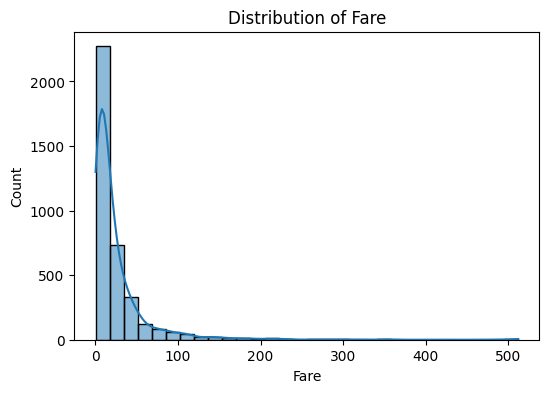

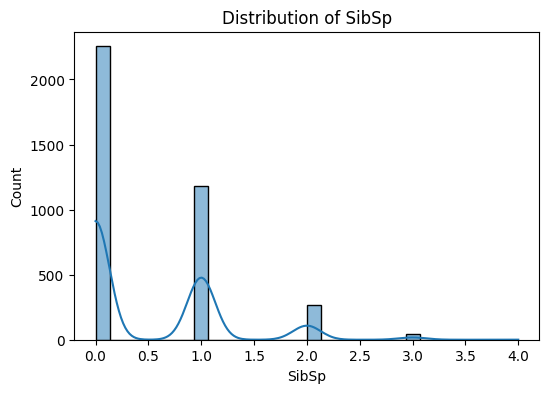

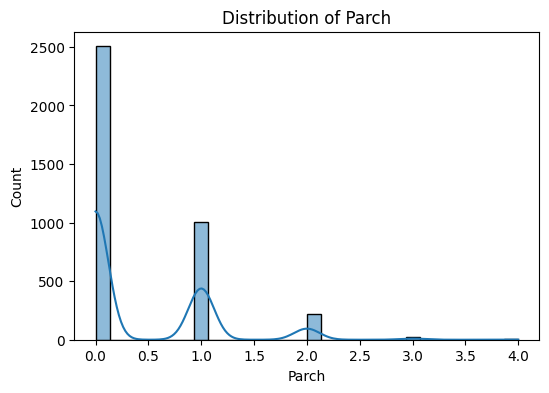

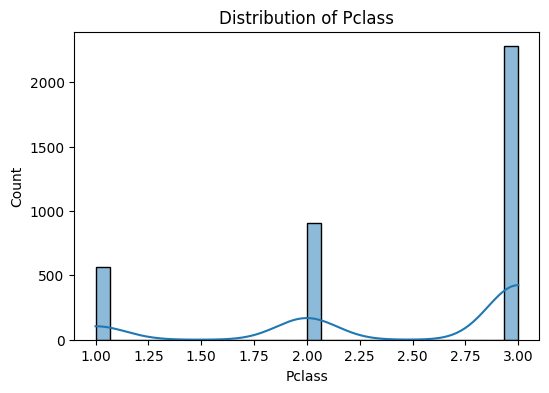

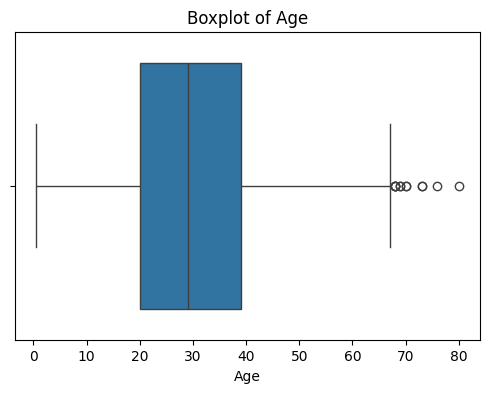

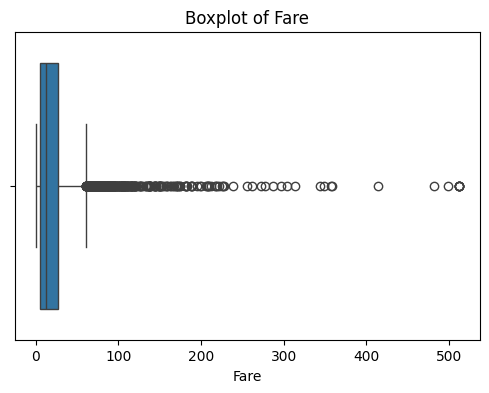

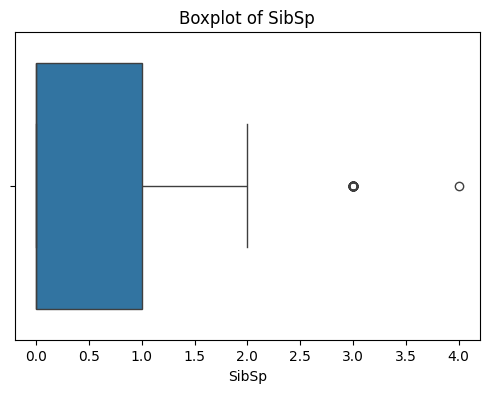

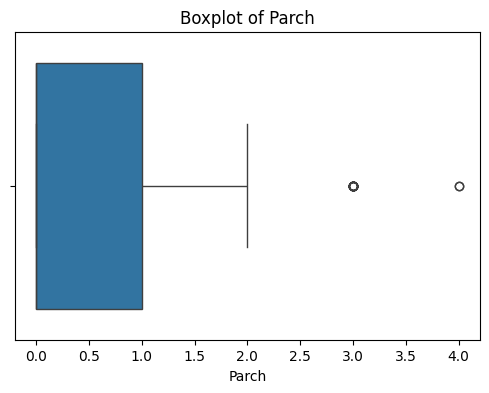

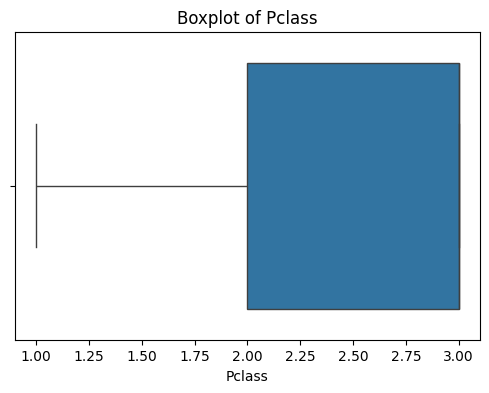

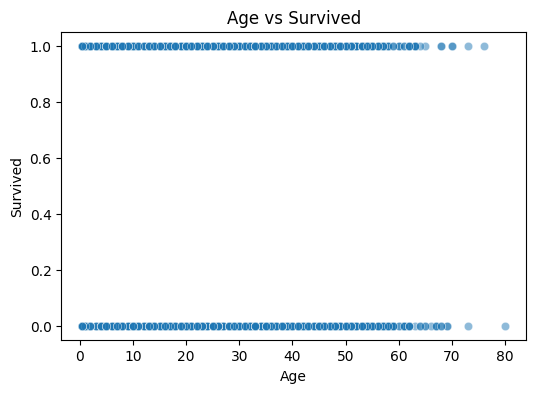

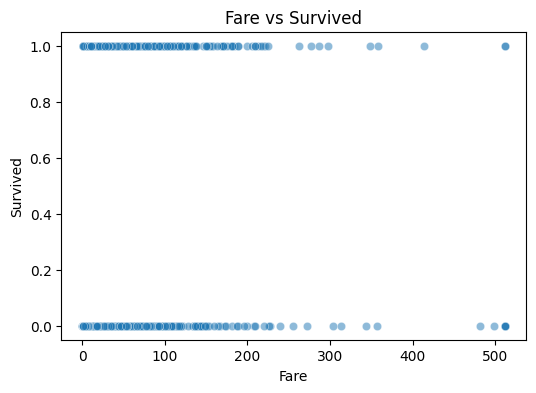

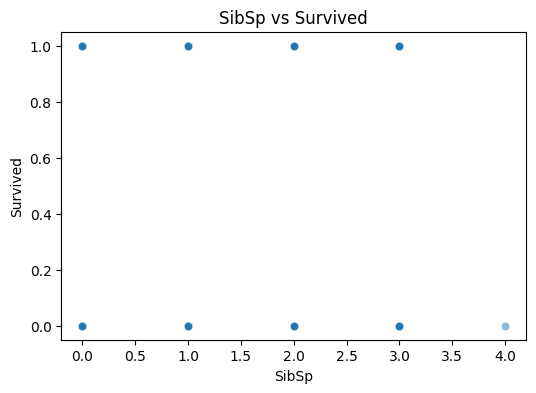

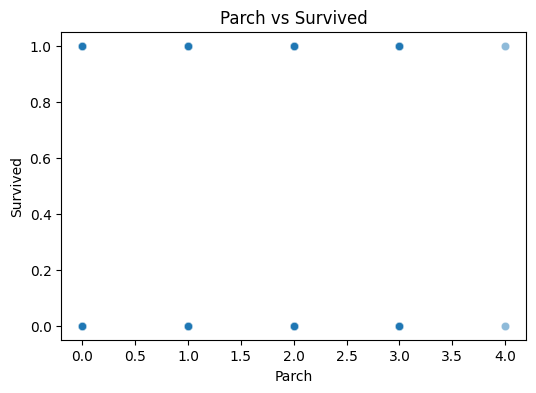

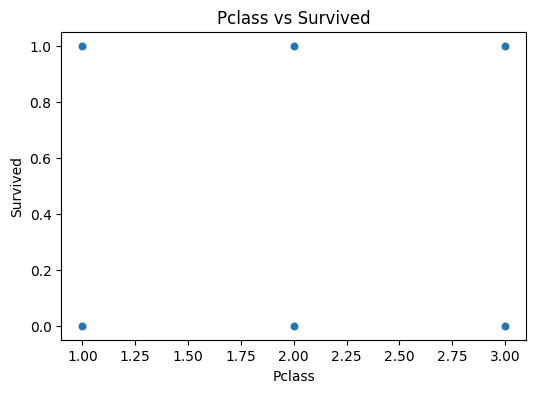

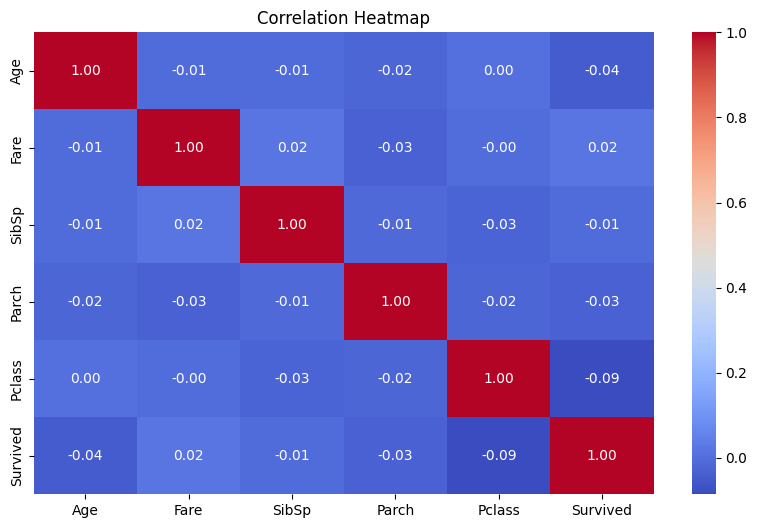

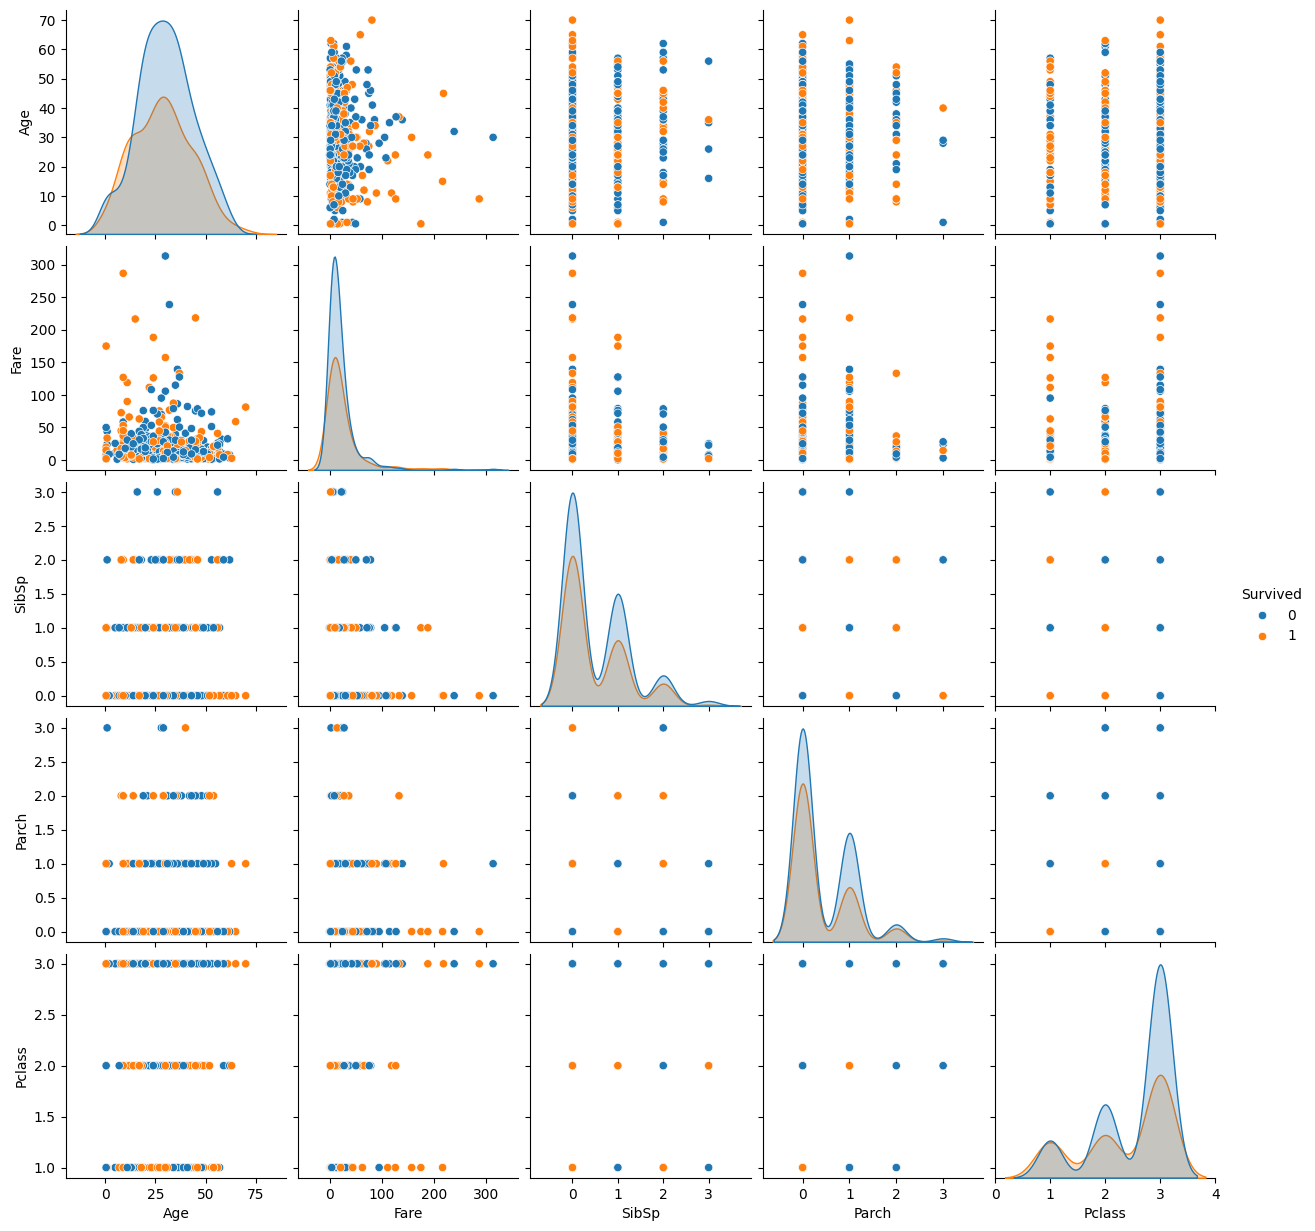

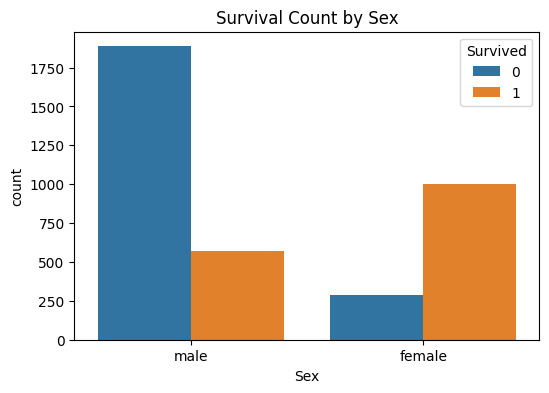

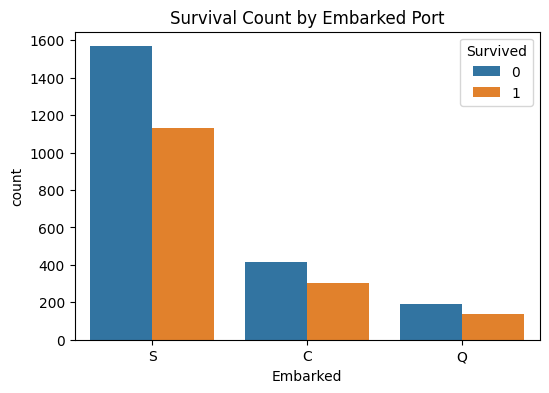

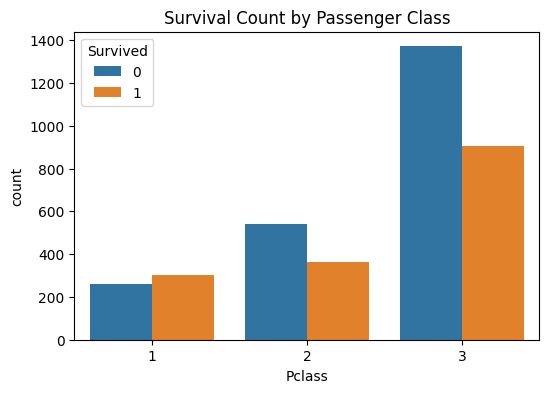

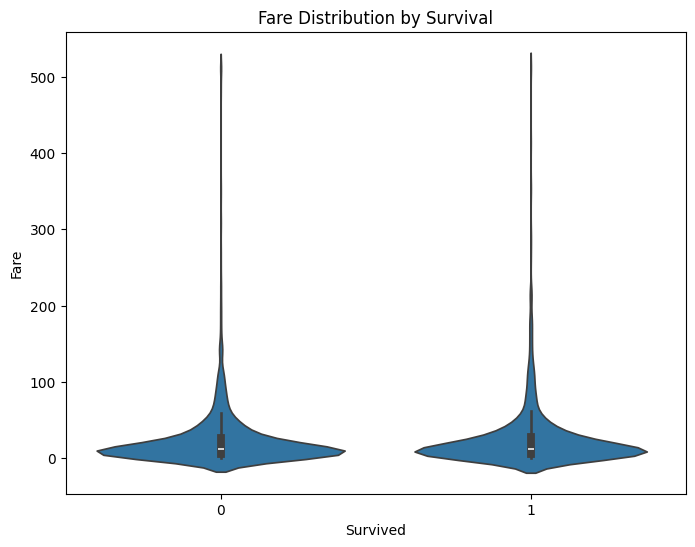

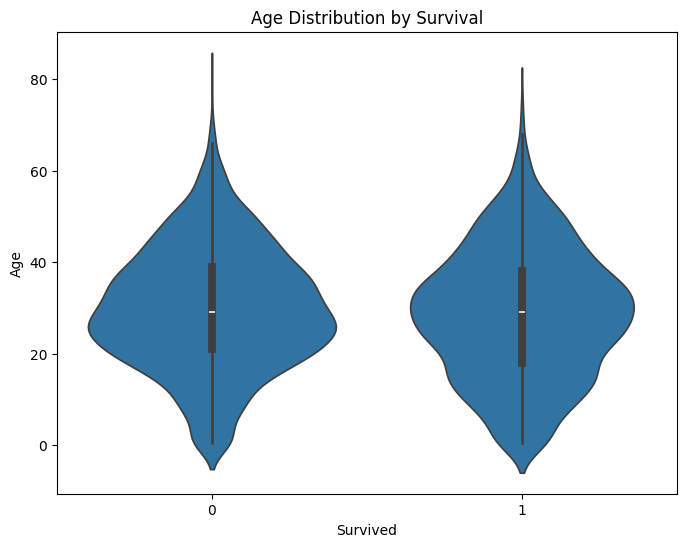

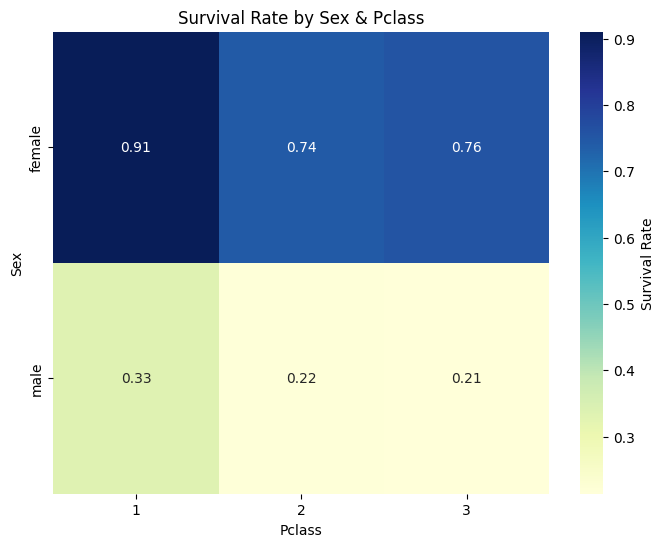

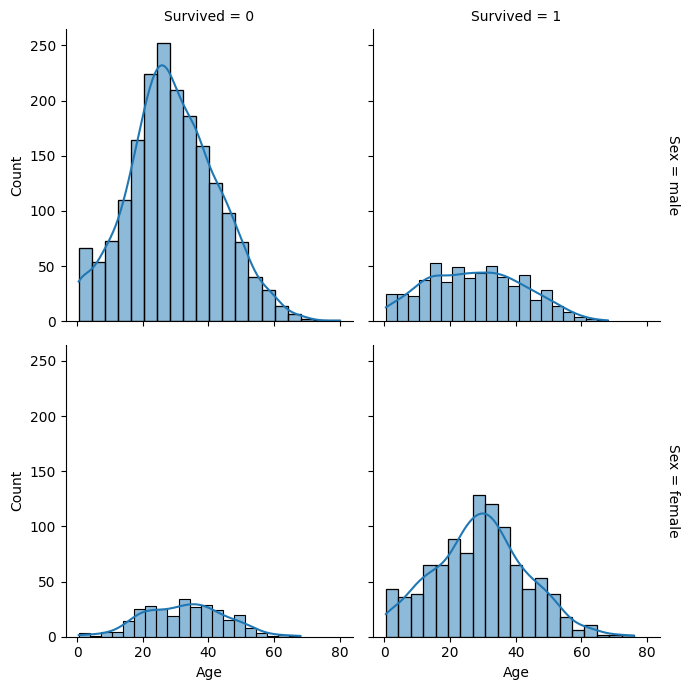

In [8]:
numeric_cols = ["Age", "Fare", "SibSp", "Parch", "Pclass"]

# ===============================
# 1. Univariate Analysis
# ===============================

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# ===============================
# 2. Bivariate Analysis
# ===============================

# Scatterplots (numeric vs Survived)
pairs = [
    ("Age", "Survived"),
    ("Fare", "Survived"),
    ("SibSp", "Survived"),
    ("Parch", "Survived"),
    ("Pclass", "Survived"),
]

for x, y in pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
    plt.title(f"{x} vs {y}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[numeric_cols + ["Survived"]].corr(), annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (sample for speed)
sns.pairplot(
    df[numeric_cols + ["Survived"]].dropna().sample(500, random_state=42),
    hue="Survived",
)
plt.show()

# ===============================
# 3. Categorical Analysis
# ===============================

# Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival Count by Sex")
plt.show()

# Survival by Embarked
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival Count by Embarked Port")
plt.show()

# Survival by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival Count by Passenger Class")
plt.show()

# ===============================
# 4. Advanced Visualizations
# ===============================

# Fare distribution by survival
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Survived", y="Fare")
plt.title("Fare Distribution by Survival")
plt.show()

# Age distribution by survival
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Survived", y="Age")
plt.title("Age Distribution by Survival")
plt.show()

# Heatmap of survival rate by Sex & Pclass
pivot = df.pivot_table(values="Survived", index="Sex", columns="Pclass", aggfunc="mean")
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={"label": "Survival Rate"}
)
plt.title("Survival Rate by Sex & Pclass")
plt.show()

# FacetGrid: Age distribution by survival & sex
g = sns.FacetGrid(df, col="Survived", row="Sex", height=3.5, margin_titles=True)
g.map_dataframe(sns.histplot, x="Age", bins=20, kde=True)
g.set_axis_labels("Age", "Count")
plt.show()